In [82]:
import numpy as np
import pandas as pd
from PIL import Image
from skimage import filters
import scipy.ndimage as sciimage
from skimage import measure as meas
import matplotlib.pyplot as plt

### Templates for Identification of Characters

In [83]:
def identify_characters(full_path):
    
    input_images = {}
    
    begin = ord("A")
    end = ord("Z") + 1
    for i in range(begin,end):
        input_images[chr(i)] = np.array(Image.open(full_path + chr(i) + ".bmp"))
    
    begin = ord("0")
    end = ord("9") + 1
    for i in range(begin,end):
        input_images[chr(i)] = np.array(Image.open(full_path + chr(i) + ".bmp"))
    
    characters = np.array(list(input_images.values()))
    return characters

### Detection of Number Plate

In [123]:
# Path where our image is located
path = "C:\\Users\\amith\\Documents\\Number Plate Recognition\\Number Plate Images\\image2.png"

# Opening of Image
image = Image.open(path)

# Conversion of Image to grayscale
image_grayscale = image.convert("L")

# Making the pixel values binary (either 0's or 1's) in the image
image_binarized = (np.array(image_grayscale) / 255.0).round()

# Applying Sobel Edge Detector to detect edges
image_edges_X = sciimage.sobel(image_binarized,axis=0)
image_edges_y = sciimage.sobel(image_binarized,axis=1)
image_edges = np.int64(np.sqrt(image_edges_X**2 + image_edges_y**2).round())

In [148]:
image_region_properties = meas.regionprops(label_image=image_edges)

label = []
bounding_box = []
area = []

property_count = 0

for i in image_region_properties:
    label.append(i.label)
    bounding_box.append(i.bbox)
    area.append(i.area)
    property_count += 1

max_area = max(area)
max_area_bounding_box = bounding_box[area.index(max_area)]
for i in range(property_count):
    if max_area < area[i]:
        max_area = area[i]
        max_area_bounding_box = bounding_box[i]

In [180]:
row_1, col_1, row_2, col_2 = max_area_bounding_box

image_cropped = image_binarized[row_1:row_2, col_1:col_2]

image_cropped_inverted = 1 - image_cropped
image_labelled, number_of_labels = sciimage.label(image_cropped_inverted)
component_sizes = sciimage.sum(image_cropped_inverted,image_labelled,range(number_of_labels+1))
mask = component_sizes > 500
image_filtered_before_inversion = np.int64(mask[image_labelled])
image_filtered = 1 - image_filtered_before_inversion

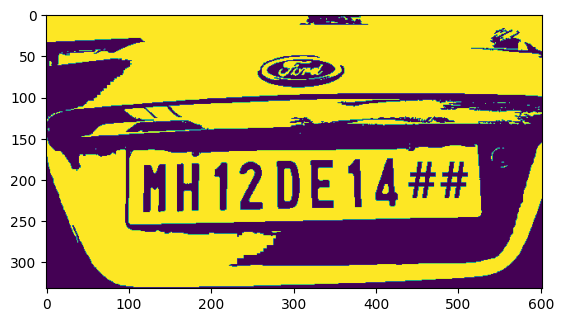

In [186]:
plt.imshow(image_filtered)

In [187]:
for i in image_region_properties:
    print(i.area)

3829.0
1152.0
3731.0
16281.0
